In [1]:
%pylab inline
import matplotlib.ticker as ticker

Populating the interactive namespace from numpy and matplotlib


In [2]:
def generate_irgb(H, h, D, n, LED, wavelength):
    """
        Given the camera height, the bubble height, the bubble diameter, 
        the index of refraction of the bubble solution, the LED array of ratios, and the array of wavelengths, 
        this function generates the relative intensity array of RGB values as a function of thickness vs
        radial distance.

        Args:
            H: Camera height in cm
            h: Bubble height in cm
            D: Bubble diameter in cm
            n: index of refraction of bubble solution
            LED: array of relative RBG intensity for LED
            wavelength: array of peak wavelengths for LED

        Return: 
            Irgb: 3D array of RGB values as a function of thickness vs radial distance
    """

    # Calculate radius from h and D
    Rad = (4 * (h**2) + D**2) / (8 * h);

    # Define the geometrical limits for the simluation
    # Set number of indices for value of the angle theta in degress
    #Nx = 1200

    # Set number of indices and limits on the thickness of the soap bubbl in nm
    Ny = 1200
    emin = 1 # min thickness
    emax = Ny # max thickness

    # Set number of indices for radial distance from the centre in mm
    Nr = 1200

    # Create e array for all possible thicknesses
    e = []
    for p in range (0, Ny):
        e.append(emin + (p * (emax - emin))/ Ny)

    # Create n2, the index of refraction squared (used in later calculations)
    n2 = n * n

    # Generate table of zeroes for radial distance (r) vs thickness
    Irgb = zeros((Ny, Nr, len(LED)))

    # Populate Irgb array
    # Begin theta cycle
    for rk in range(1, Nr):
        xr = D / 2 / Nr * rk

        theta = math.asin(xr / Rad) + math.atan(xr / (Rad - Rad * cos(math.asin(xr / Rad)) + H - h))
        
        if (pi / 2 - theta <= 0.01): 
            theta = 0

        K = cos(theta)
        I = sin(theta)
        J = sqrt(n2 - I**2)

        C01 = (K - J) / (K + J)
        C02 = (n2 * K - J) / (n2 * K + J)

        # Begin d cycle for r vs t
        for yk in range(Ny):
            d = e[yk]
            Ref = []
            Ir = []
            
            # Begin lambda cycle
            for j in range(len(LED)):
                lamda = wavelength[j]
                phase = 4 * (math.pi) / lamda * J * d # Phase difference

                # Reflected intensity spectrum 

                Ref.append((C01**2) * (1 - cos(phase)) / (1 + (C01**4) - 2 * (C01**2) * cos(phase))+ (C02**2) * (1 - cos(phase)) / (1 + (C02**4) - 2 * (C02**2) * cos(phase)))
                Ir.append(LED[j] * Ref[j])
            # End of lambda cycle

            Irgb[yk][rk - 1][0] = Ir[2]
            Irgb[yk][rk - 1][1] = Ir[1]
            Irgb[yk][rk - 1][2] = Ir[0]
            
        # End of d cycle 
        
    # End of theta cycle
    
    # 2.2 gamma correction for display
    Irgb = Irgb**(1 / 2.2)
    
    return Irgb

In [3]:
def plot_irgb(Irgb):
    """
        Given a 3D array of RGB values as a function of thickness vs radial distance,
        this function plots the simulation along with a colormap.

        Args:
            Irgb: 3D array of RGB values as a function of thickness vs radial distance
    """
    fig = figure(figsize(105, 105))
    ax = fig.add_subplot(1, 2, 1)
    imgplot = imshow(Irgb)
    ax.set_title('Thickness vs Radial Distance Across Bubble')
    xlim((0, 1200))
    ylim((0, 1200))
    
    # Change the xaxis labels to distance from center (cm)
    scale_x = 5/1200
    ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*scale_x))
    ax.xaxis.set_major_formatter(ticks_x)

In [15]:
def run_irgb_sim(H, h, D, n, LED, wavelength):
    """
        Given the camera height, the bubble height, the bubble diameter, 
        the index of refraction of the bubble solution, the LED array of ratios, and the array of wavelengths, 
        this function runs the simulation and produces a colormap of thickness vs radial distance.

        Args:
            H: Camera height in cm
            h: Bubble height in cm
            D: Bubble diameter in cm
            n: index of refraction of bubble solution
            LED: array of relative RBG intensity for LED
            wavelength: array of peak wavelengths for LED
    """
    plt.rcParams['font.size'] = '80'
    plt.xlabel('Distance from center (cm)')
    plt.ylabel('film thickness (nm)')
    Irgb = generate_irgb(H, h, D, n, LED, wavelength)
    plot_irgb(Irgb)

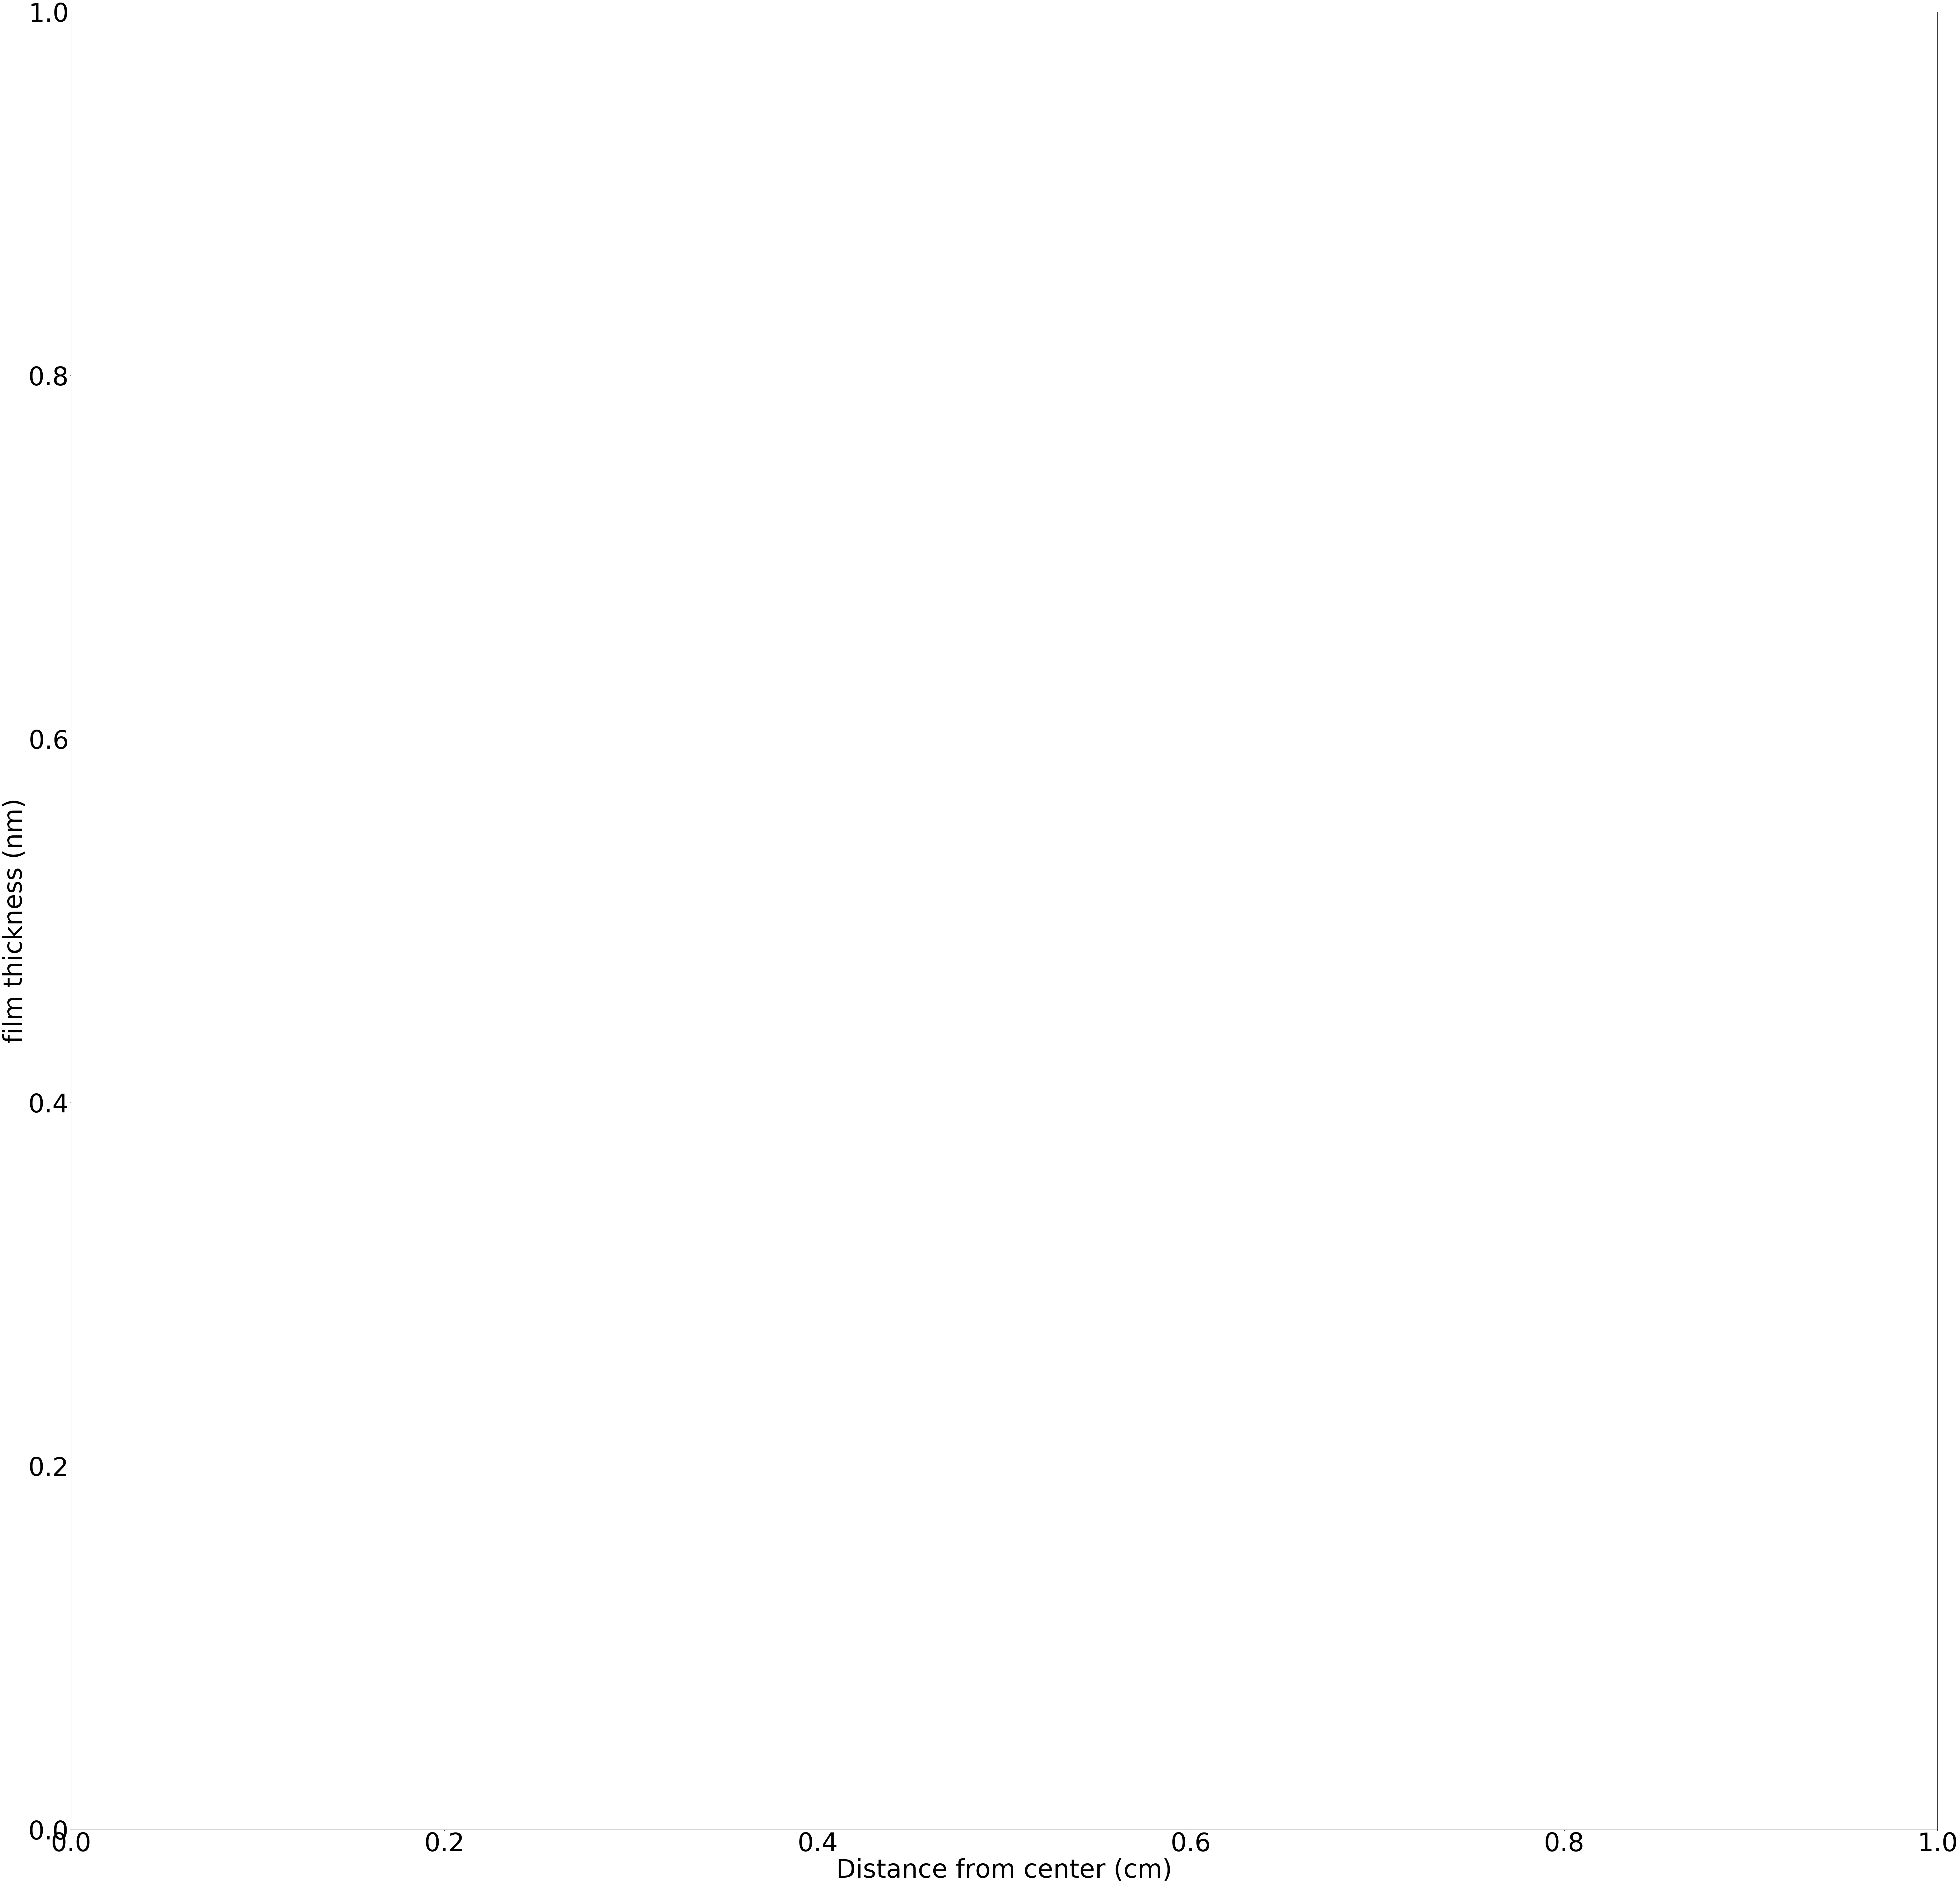

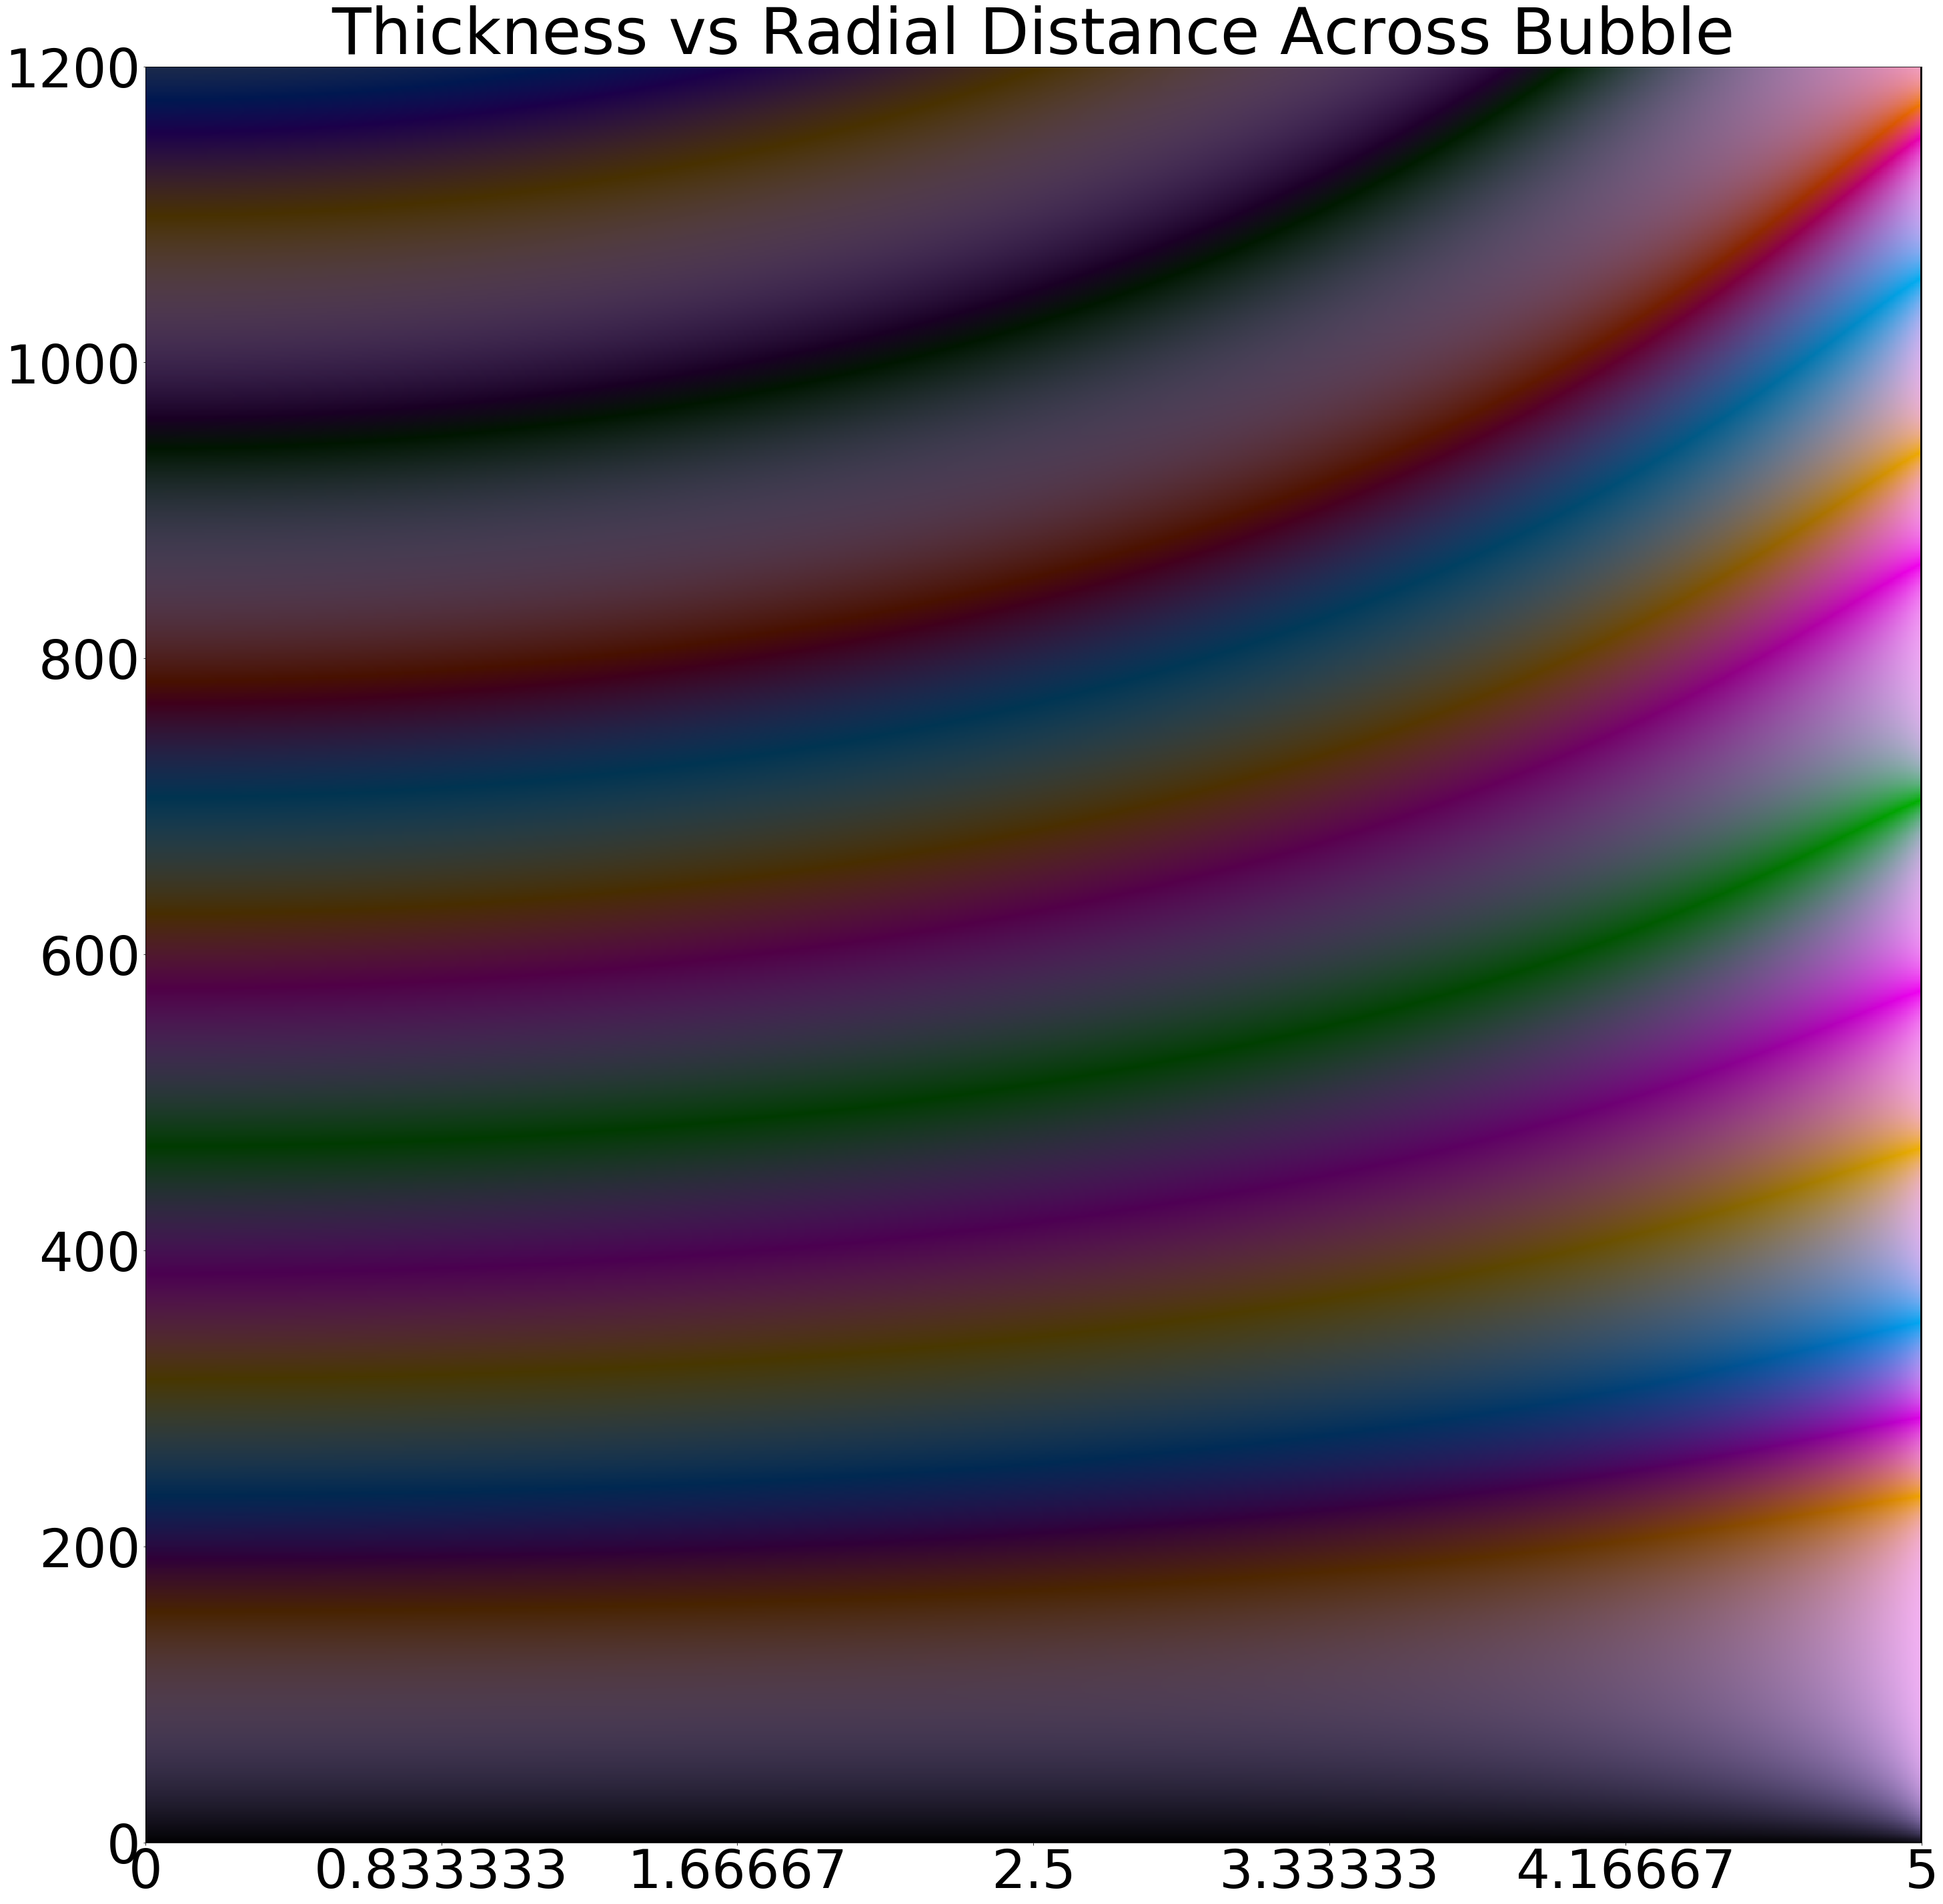

In [14]:
# run_irgb_sim(H, h, D, n, LED, wavelength)
run_irgb_sim(61, 6, 10, 1.338, [1,1,1], [420,515,630])